In [2]:
import numpy as np
import pandas as pd
import os

dfs = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        df = pd.read_csv(path, delimiter='|')
        if 'id' in df.columns:
            df.drop(['id'], axis=1, inplace=True)
        dfs.append(df)

In [3]:
df = pd.concat(dfs, ignore_index=True)

In [3]:
df.shape

(89132, 231)

In [4]:
df.dropna(axis=1, how='all', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89132 entries, 0 to 89131
Columns: 185 entries, nct_id to calculate_percentage
dtypes: float64(33), object(152)
memory usage: 125.8+ MB


In [5]:
df.fillna('', axis=1)

,nct_id,organization,name,phone,email,extension,outcome_type,title,description,time_frame,...,reason,non_inferiority_type,p_value_modifier,p_value,p_value_description,method,removed,number_analyzed,population_description,calculate_percentage
0,NCT01865617,Fred Hutchinson Cancer Research Center,Dr. Jordan Gauthier,206-667-2713,jgauthier@fredhutch.org,,,,,,...,,,,,,,,,,
1,NCT01218867,National Cancer Institute,Dr. Steven Rosenberg,301- 496-4164,sar@mail.nih.gov,,,,,,...,,,,,,,,,,
2,NCT01318317,City of Hope,Dr. Lwaliw Popplewell,626-359-8111,lpopplewell@coh.org,,,,,,...,,,,,,,,,,
3,NCT03019055,Froedtert Hospital and the Medical College of ...,"Dr. Nirav Shah, MD",414-805-8900,cccto@mcw.edu,,,,,,...,,,,,,,,,,
4,NCT02028455,Seattle Children's,Dr Rebecca Gardner,206-987-2000,icc-plat@seattlechildrens.org,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89127,NCT04160195,,,,,,,Race (NIH/OMB),,,...,,,,,,,,2.0,,
89128,NCT04160195,,,,,,,Race (NIH/OMB),,,...,,,,,,,,2.0,,
89129,NCT04160195,,,,,,,Race (NIH/OMB),,,...,,,,,,,,2.0,,
89130,NCT04160195,,,,,,,Region of Enrollment,,,...,,,,,,,,2.0,,


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89132 entries, 0 to 89131
Columns: 185 entries, nct_id to calculate_percentage
dtypes: float64(33), object(152)
memory usage: 125.8+ MB


In [10]:
dtype_dict = {}
for col in df.columns:
    d = df[col].dtype
    if d in dtype_dict:
        dtype_dict[d] = dtype_dict[d] + 1
    else:
        dtype_dict[d] = 1

In [11]:
dtype_dict

{dtype('O'): 152, dtype('float64'): 33}

In [12]:
df.isna().sum()

nct_id                        0
organization              89096
name                      67292
phone                     86573
email                     86746
                          ...  
method                    89131
removed                   87821
number_analyzed           85856
population_description    89111
calculate_percentage      88927
Length: 185, dtype: int64

In [6]:
str_columns = []
float_columns = []

for col in df.columns:
    d = df[col].dtype
    if d is df['nct_id'].dtype:
        str_columns.append(col)
    else:
        float_columns.append(col)
        
print(len(str_columns))
print(len(float_columns))

152
33


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

# Assuming df is your DataFrame
# Extract numeric columns
numeric_df = df[float_columns]

# Handle missing values for numeric columns
numeric_df.fillna(0, inplace=True)

# Standardize the numeric data
scaler = StandardScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df)

# Extract text columns
text_df = df[str_columns]

# Handle missing values for text columns
text_df.fillna("", inplace=True)

/tmp/ipykernel_47/1814695062.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.fillna(0, inplace=True)
/tmp/ipykernel_47/1814695062.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.fillna("", inplace=True)


In [27]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(numeric_df)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(combined_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2774427055948417.0
0.3323730624358564


In [8]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # You can adjust parameters
text_features = vectorizer.fit_transform(text_df.apply(lambda x: ' '.join(x), axis=1))

In [9]:
# Combine numeric and text features
combined_features = pd.concat([pd.DataFrame(numeric_df_scaled, columns=numeric_df.columns), pd.DataFrame(text_features.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

In [24]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(combined_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(combined_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1169227.9730773761
0.4449321104036514


In [25]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(combined_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(combined_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2000051.5131491583
0.43384822840687454


In [26]:
kmeans = KMeans(n_clusters=26, random_state=42)
kmeans.fit(combined_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(combined_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


642167.744289462
0.5134840405021275


In [10]:
kmeans = KMeans(n_clusters=36, random_state=42)
kmeans.fit(combined_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(combined_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


428262.6372550141
0.5171975094191679


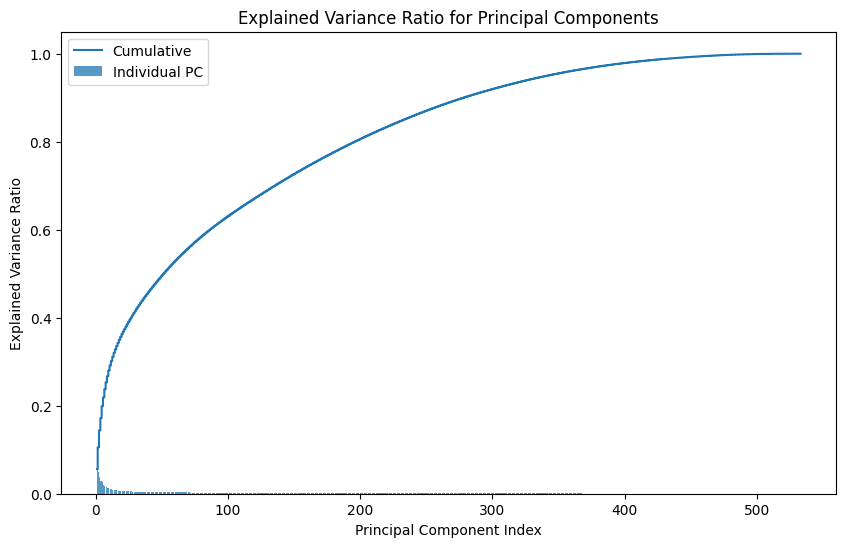

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined_features_standardized = scaler.fit_transform(combined_features)

pca = PCA()
pca_result = pca.fit_transform(combined_features_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.75, align='center', label='Individual PC')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.legend()
plt.show()

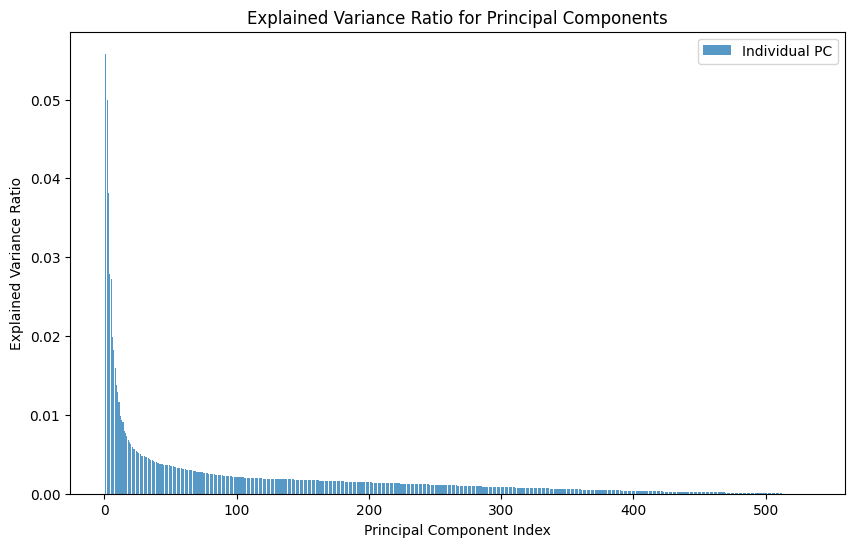

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.75, align='center', label='Individual PC')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.legend()
plt.show()

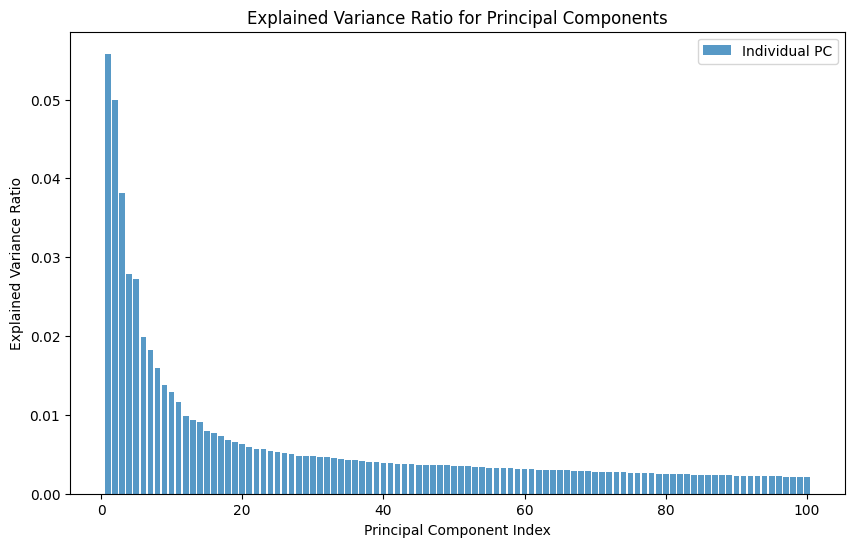

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 101), explained_variance_ratio[:100], alpha=0.75, align='center', label='Individual PC')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.legend()
plt.show()

In [19]:
num_components_to_select = 10
selected_pca_features = pca_result[:, :num_components_to_select]

kmeans = KMeans(n_clusters=26, random_state=42)
kmeans.fit(selected_pca_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(selected_pca_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

305624.21770002815
0.5627146136983777


In [20]:
num_components_to_select = 65
selected_pca_features = pca_result[:, :num_components_to_select]

kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(selected_pca_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(selected_pca_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11722532.919422226
0.14637291318687576


In [21]:
num_components_to_select = 65
selected_pca_features = pca_result[:, :num_components_to_select]

kmeans = KMeans(n_clusters=26, random_state=42)
kmeans.fit(selected_pca_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(selected_pca_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9317396.270087939
0.168476097895085


In [22]:
num_components_to_select = 10
selected_pca_features = pca_result[:, :num_components_to_select]

kmeans = KMeans(n_clusters=36, random_state=42)
kmeans.fit(selected_pca_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(selected_pca_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


239864.45470691018
0.46245310583887134


In [23]:
num_components_to_select = 5
selected_pca_features = pca_result[:, :num_components_to_select]

kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(selected_pca_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(selected_pca_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


96503.0461480781
0.6473237219631262


In [24]:
num_components_to_select = 5
selected_pca_features = pca_result[:, :num_components_to_select]

kmeans = KMeans(n_clusters=26, random_state=42)
kmeans.fit(selected_pca_features)
inertia_val = kmeans.inertia_
silhouette_score_val = silhouette_score(selected_pca_features, kmeans.labels_)

print(inertia_val)
print(silhouette_score_val)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


60239.97447900078
0.5523962176349452


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

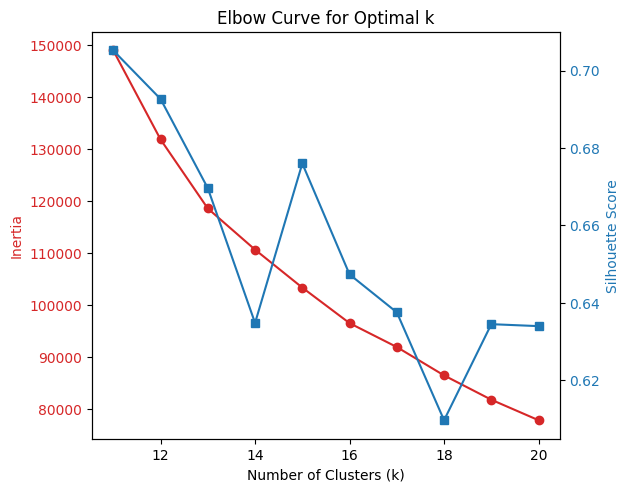

In [26]:
num_components_to_select = 5
selected_pca_features = pca_result[:, :num_components_to_select]

inertia = []
silhouette_scores = []
k_values = range(11, 21)  # You can adjust the range of k values

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_pca_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(selected_pca_features, kmeans.labels_))

# Plotting the elbow curve
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_values, inertia, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_values, silhouette_scores, 's-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Elbow Curve for Optimal k')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

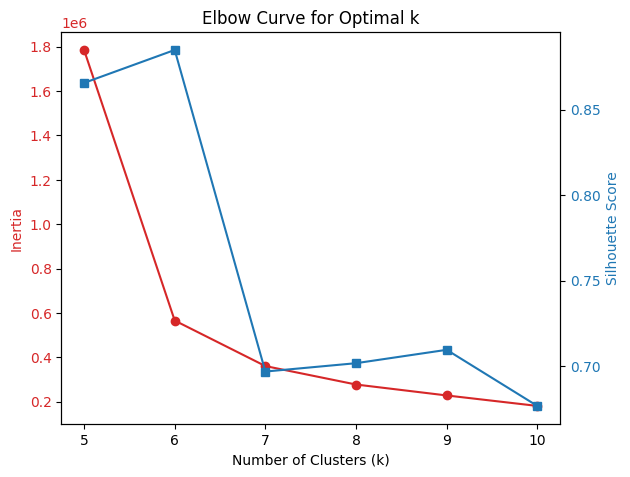

In [27]:
num_components_to_select = 5
selected_pca_features = pca_result[:, :num_components_to_select]

inertia = []
silhouette_scores = []
k_values = range(5, 11)  # You can adjust the range of k values

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_pca_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(selected_pca_features, kmeans.labels_))

# Plotting the elbow curve
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_values, inertia, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_values, silhouette_scores, 's-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Elbow Curve for Optimal k')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

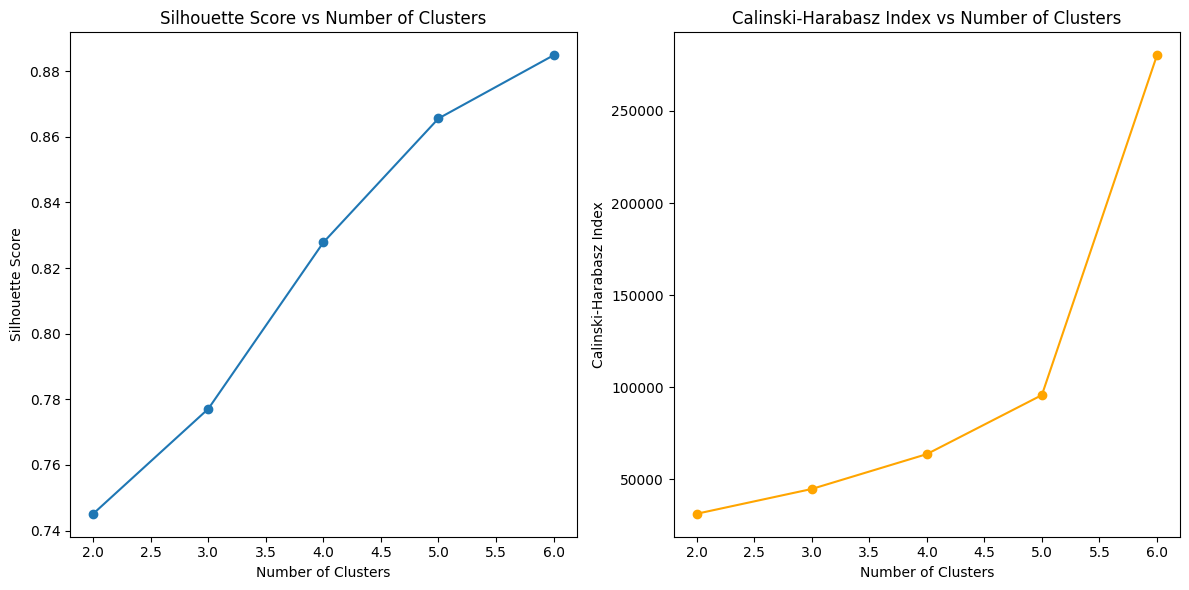

In [32]:
num_components_to_select = 5
selected_pca_features = pca_result[:, :num_components_to_select]

from sklearn.metrics import calinski_harabasz_score

num_clusters_range = range(2, 7)

silhouette_scores = []
calinski_harabasz_indices = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(selected_pca_features)

    # Silhouette Score
    silhouette_scores.append(silhouette_score(selected_pca_features, labels))

    # Calinski-Harabasz Index
    calinski_harabasz_indices.append(calinski_harabasz_score(selected_pca_features, labels))

# Plotting the results
plt.figure(figsize=(12, 6))

# Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Index
plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, calinski_harabasz_indices, marker='o', color='orange')
plt.title('Calinski-Harabasz Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()

In [33]:
silhouette_scores[4]

0.8848793775610343

In [34]:
calinski_harabasz_indices[4]

280183.7422952815

Hence, a cluster size of **6** is best for this dataset.